<a href="https://colab.research.google.com/github/syakibb/ML/blob/main/Latihan%20ML%20-%20Pertemuan%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN Clustering Lokasi Restoran

In [4]:
!pip install adjustText

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from geopy.point import Point
from adjustText import adjust_text
import matplotlib.pyplot as plt

   Nama Restoran  Latitude  Longitude  Cluster
0     Bakso Udin    -6.402    106.794        0
1  Mie Ayam Enak    -6.403    106.795        0
2    Sate Madura    -6.401    106.796        0
3    Ayam Geprek    -6.404    106.793        0
4    Nasi Goreng    -6.400    106.792        0
5    Pizza Lezat    -6.230    106.827        1
6  Burger Mantap    -6.231    106.828        1
7    Sushi Hebat    -6.229    106.826        1
8    Ramen Pedas    -6.232    106.825        1
9    Kopi Nikmat    -6.233    106.829        1


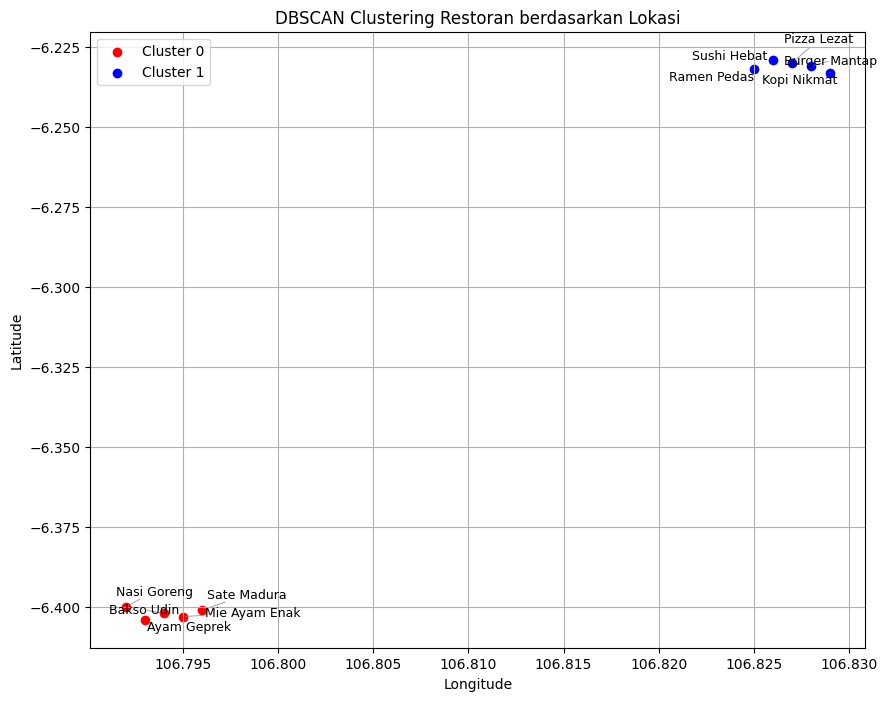

In [6]:
# Data lokasi restoran (latitude, longitude) contoh nyata
data = {
    'Nama Restoran': ['Bakso Udin', 'Mie Ayam Enak', 'Sate Madura', 'Ayam Geprek', 'Nasi Goreng',
                      'Pizza Lezat', 'Burger Mantap', 'Sushi Hebat', 'Ramen Pedas', 'Kopi Nikmat'],
    'Latitude': [-6.402, -6.403, -6.401, -6.404, -6.400, -6.230, -6.231, -6.229, -6.232, -6.233],
    'Longitude': [106.794, 106.795, 106.796, 106.793, 106.792, 106.827, 106.828, 106.826, 106.825, 106.829]
}

df = pd.DataFrame(data)

# Konversi ke array NumPy
coords = df[['Latitude', 'Longitude']].to_numpy()

# DBSCAN dengan metric haversine (jarak di bumi), eps dalam kilometer
def geo_dbscan(coords, eps_km=0.5, min_samples=2):
    kms_per_radian = 6371.0088
    epsilon = eps_km / kms_per_radian

    db = DBSCAN(eps=epsilon, min_samples=min_samples, algorithm='ball_tree', metric='haversine')
    db.fit(np.radians(coords))
    return db.labels_

# Menjalankan clustering
df['Cluster'] = geo_dbscan(coords, eps_km=1)

# Tampilkan hasil
print(df)

# Visualisasi
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']
plt.figure(figsize=(10, 8)) # Memperbesar ukuran figure agar lebih mudah dilihat

texts = []
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'],
                label=f'Cluster {cluster}', c=colors[cluster % len(colors)])
    for i, row in cluster_data.iterrows():
        # Menambahkan teks ke dalam list texts
        texts.append(plt.text(row['Longitude'], row['Latitude'], row['Nama Restoran'], fontsize=9))

# Mengatur posisi teks agar tidak tumpang tindih
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.title('DBSCAN Clustering Restoran berdasarkan Lokasi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()